# TP 2.1: Un peu de probabilités

## 1. Autour de la loi normale

La fonction `rnorm()` permet de générer des observations indépendantes d'une loi normale. Par défaut, la moyenne de cette loi est nulle et la variance vaut 1.

In [1]:
# Génère un vecteur de 10 observations
vecteur_gaussien_10 <- rnorm(10)
vecteur_gaussien_10

[1]  0.3474002  1.1717882  0.2887411 -0.6831746  0.2320734  0.1804263
 [7]  0.6754913 -0.6338987 -2.5371046 -1.2352638

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Représenter l'histogramme des valeurs contenues dans <code>vecteur_gaussien_10</code> grâce à la fonction <code>hist()</code> en limitant l'axe des abscisses à $[-3,3]$.</li>
        <li>Effectuer les mêmes opérations en générant cette fois 100 observations dans un objet <code>vecteur_gaussien_100</code>. Commenter.</li>
        <li>Dans une matrice de taille $200 \times 10$, générer des observations d'une loi normale centrée réduite.</li>
        <li>Calculer les 200 moyennes des 200 échantillons donnés par les lignes de la matrice précédente. Stocker les résultats dans un objet <code>vecteur_moyen_10</code> et représenter l'histogramme de ces 200 moyennes en utilisant la même échelle que précédemment pour l'axe des abscisses.</li>
        <li>Calculer la moyenne et la variance des valeurs du vecteur <code>vecteur_moyen_10</code>. Ces résultats sont-ils cohérents avec les valeurs théoriques ?</li>
        <li>Effectuer les mêmes opérations avec des échantillons de 100 observations dans une matrice $200 \times 100$.</li>
    </ol>
</div>

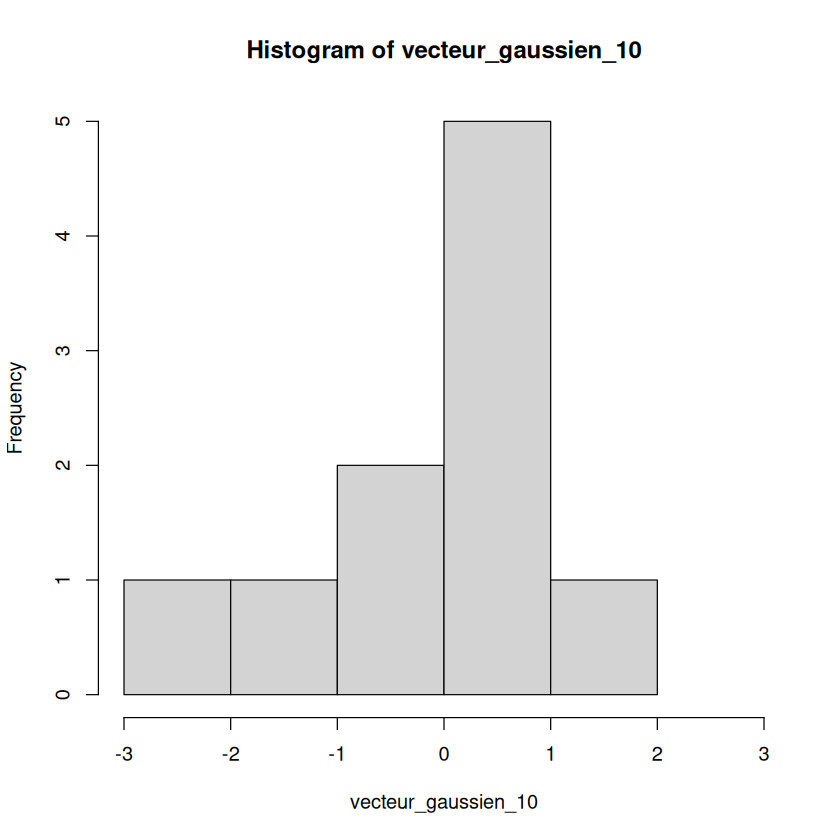

In [5]:
# À FAIRE
#1
par (bg = "white")
hist(vecteur_gaussien_10, xlim = c(-3,3))

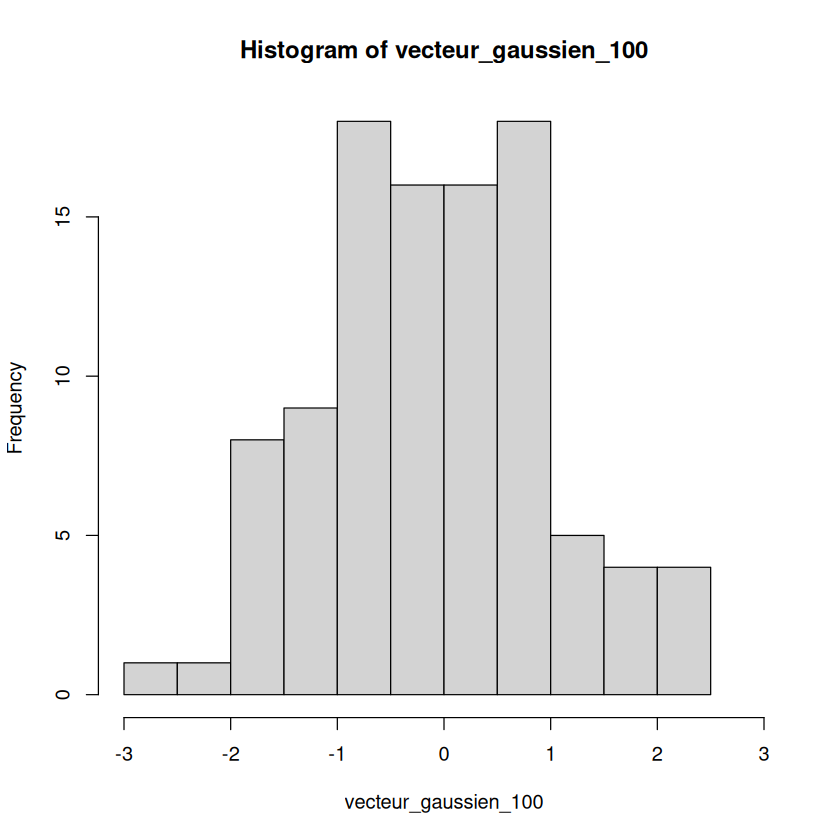

In [8]:
#2.
vecteur_gaussien_100 <- rnorm(100)

par(bg = "white")
hist(vecteur_gaussien_100, xlim = c(-3,3))

In [18]:
#3
matrice_200_10 <- matrix(rnorm(200*10), nrow=200)

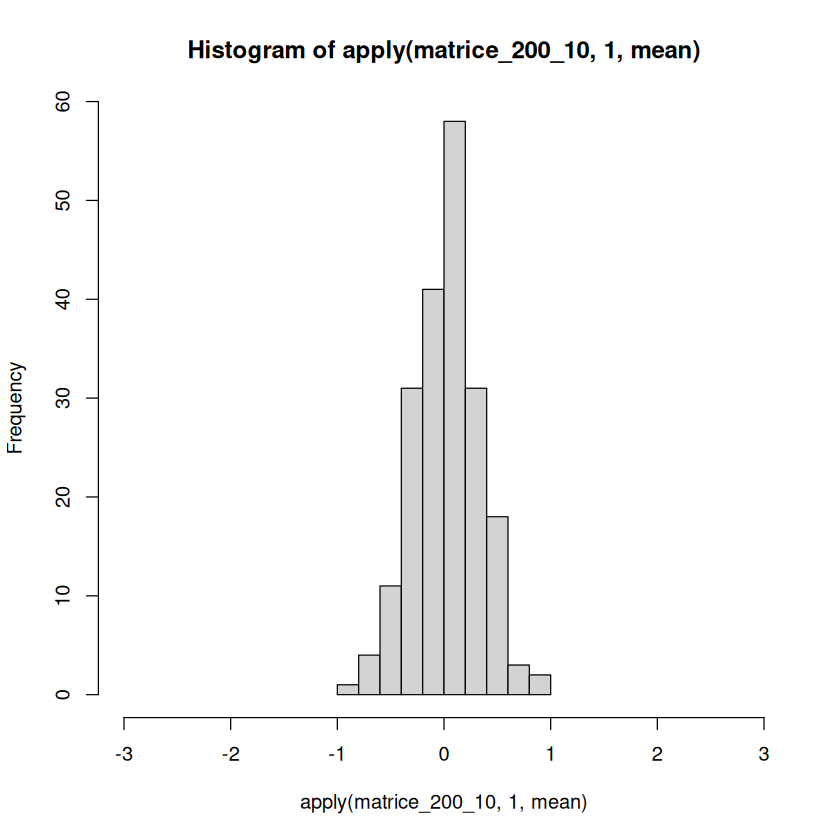

In [19]:
#4 

par(bg = "white")
hist(apply(matrice_200_10, 1, mean), xlim = c(-3,3) )

## 2. Vers la loi du $\chi^2$

Comme dans l'exercice précédent, nous générons 200 échantillons de 10 observations générées selon un loi normale centrée réduite.

In [20]:
matrice_200_10 <- matrix(rnorm(200*10), nrow=200)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>À partir de la matrice <code>matrice_200_10</code>, calculer le vecteur <code>vecteur_carre_10</code> de longueur 200 contenant la somme des carrés des valeurs de chacun des 200 échantillons de taille 10.</li>
        <li>Représenter l'histogramme de ces valeurs.</li>
        <li>Superposer la densité d'une loi de $\chi^2$ (fonction <code>dchisq()</code>)à 10 degrés de liberté.<br>
            <center><img src="img/chi2.png"></center></li>
    </ol>
</div>

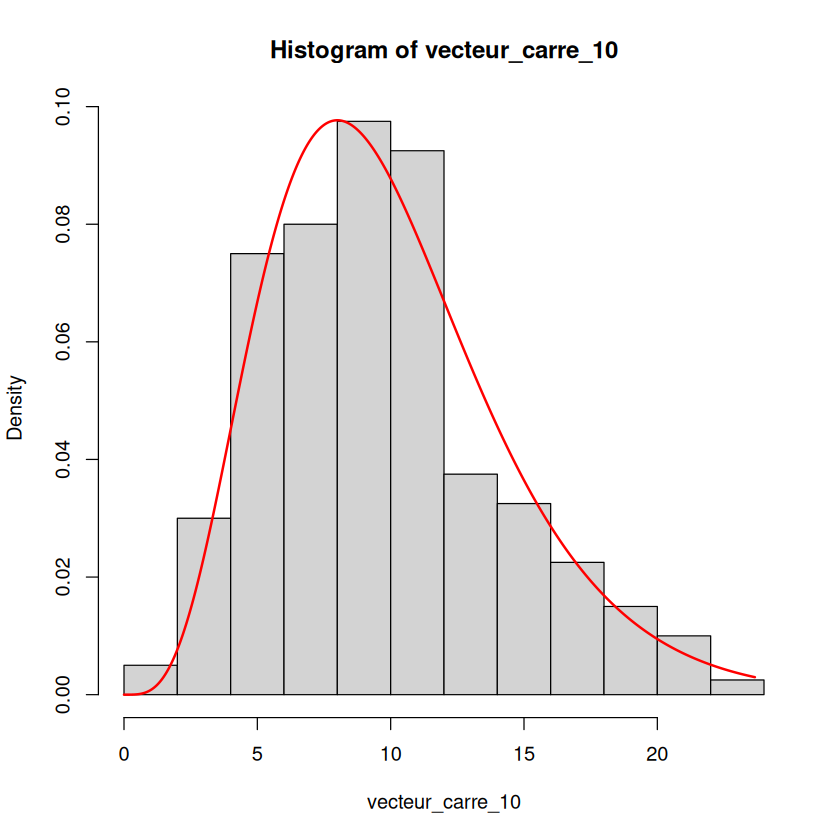

In [ ]:
# À FAIRE

#1
vecteur_carre_10 <- apply(matrice_200_10, 1, function(x) sum(x^2) )

#2
par(bg = "white")
hist(vecteur_carre_10, freq = FALSE) #freq = FALSE pour comparer à une densité de
#3
x <- seq(0, max(vecteur_carre_10), length = 1000)
lines(x, dchisq(x, df = 10), col = "red", lwd = 2)

## 3. Vers la loi de Fisher

Nous générons cette fois deux matrices remplies d'observations indépendantes de loi normale centrée réduite et de tailles respectives $200 \times 5$ et $200 \times 10$.

In [28]:
matrice_200_5 <- matrix(rnorm(200*5), nrow=200)
matrice_200_10 <- matrix(rnorm(200*10), nrow=200)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Comme dans l'exercice précédent, calculer les vecteurs <code>vecteur_carre_5</code> et <code>vecteur_carre_10</code> de longueur 200 contenant la somme des carrés des valeurs de chaque ligne des deux matrices.</li>
        <li>Calculer le vecteur <code>vecteur_rapport_5_10</code> obtenu par le rapport de <code>vecteur_carre_5</code> sur <code>vecteur_carre_10</code>.</li>
        <li>Représenter l'histogramme des 200 valeurs du vecteur <code>vecteur_rapport_5_10</code>.</li>
        <li>Superposer la densité d'une loi de Fisher (fonction <code>df()</code>)à 5 et 10 degrés de liberté.</li>
    </ol>
</div>

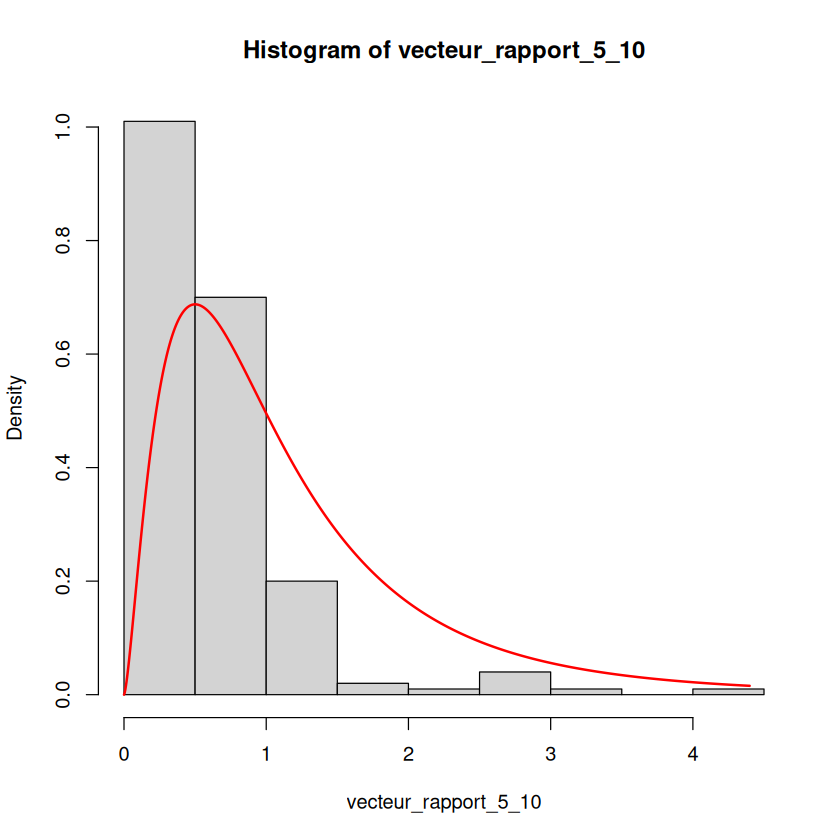

In [34]:
# À FAIRE

#1 
vecteur_carre_5 <- apply(matrice_200_5, 1, function(x) sum(x^2) )
vecteur_carre_10 <- apply(matrice_200_10, 1, function(x) sum(x^2) )

#2
vecteur_rapport_5_10 <- vecteur_carre_5/vecteur_carre_10

#3
par(bg = "white")
hist(vecteur_rapport_5_10, freq=FALSE)

x <- seq(0, max(vecteur_rapport_5_10), length = 1000)
lines(x, df(x, df1 = 5, df2 = 10), col = "red", lwd = 2)


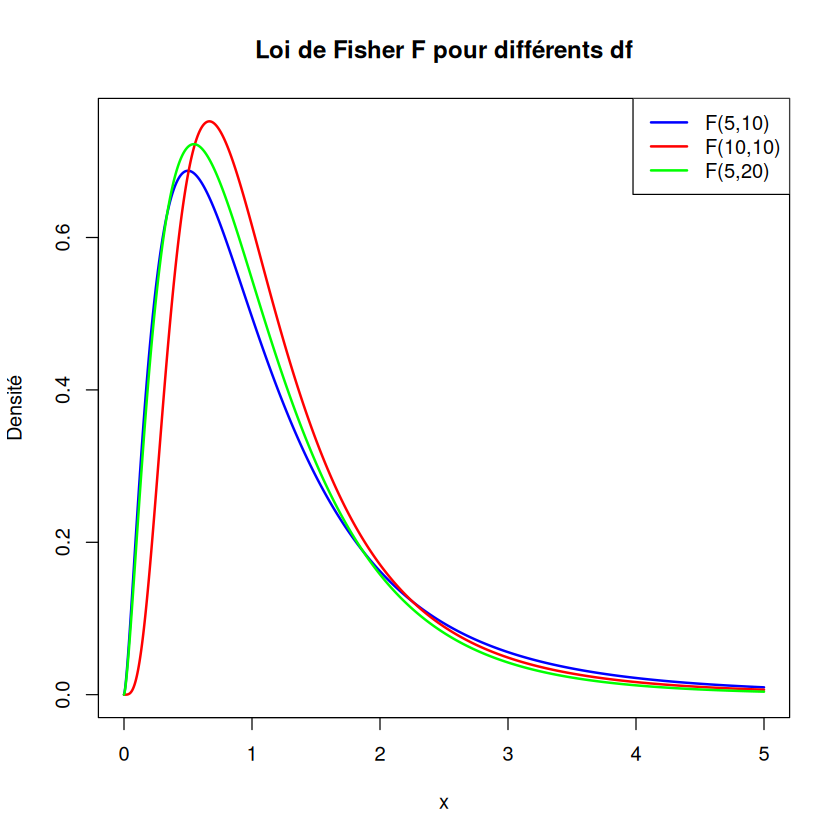

In [36]:
# Créer un vecteur de valeurs x
x <- seq(0, 5, length.out = 1000)

# Densités F pour différents df
y1 <- df(x, df1 = 5, df2 = 10)   # F(5,10)
y2 <- df(x, df1 = 10, df2 = 10)  # F(10,10)
y3 <- df(x, df1 = 5, df2 = 20)   # F(5,20)

par(bg = "white")
# Tracer la première densité
plot(x, y1, type = "l", col = "blue", lwd = 2,
     main = "Loi de Fisher F pour différents df",
     xlab = "x", ylab = "Densité", ylim = c(0, max(y1, y2, y3)))

# Ajouter les autres densités
lines(x, y2, col = "red", lwd = 2)
lines(x, y3, col = "green", lwd = 2)

# Ajouter une légende
legend("topright", legend = c("F(5,10)", "F(10,10)", "F(5,20)"),
       col = c("blue","red","green"), lwd = 2)
